<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorialAbel/blob/main/DataProcessingForCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processing Data using a single image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

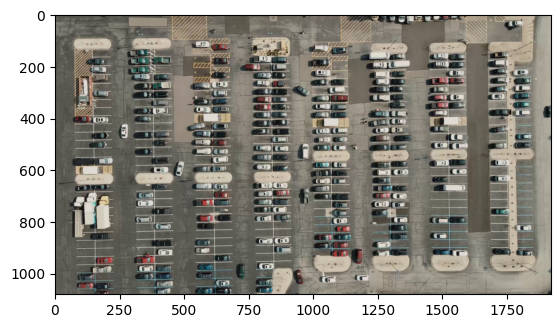

In [2]:
#loading the image
parking_image = cv2.imread("/content/drive/MyDrive/AbelFolder/parking_spot.png")
plt.imshow(parking_image[:, :, ::-1])

In [ ]:
#loading json
import json

with open("/content/drive/MyDrive/AbelFolder/CNN Models/parking-annotations.json") as f:
  data = json.load(f)
print(data)

In [4]:
#finding the keys
data.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [5]:
#access the categories
data["categories"]

[{'id': 1, 'name': 'empty-space', 'supercategory': ''},
 {'id': 2, 'name': 'non-empty-space', 'supercategory': ''}]

- id 1: empty
- id 2: non-empty

In [7]:
print(len(data["annotations"]))

392


In [8]:
print(type(data["annotations"]))

<class 'list'>


In [9]:
data["annotations"][0]

{'id': 1,
 'image_id': 1,
 'category_id': 2,
 'segmentation': [],
 'area': 2612.210399999998,
 'bbox': [288.97, 199.55, 82.98, 31.48],
 'iscrowd': 0,
 'attributes': {'occluded': False, 'rotation': 0.0}}

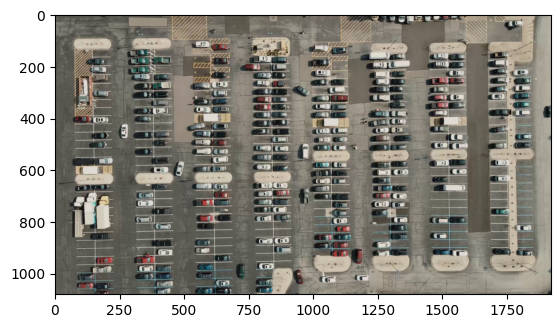

In [10]:
#copy of parking_image
parking_img_copy = parking_image.copy()
plt.imshow(parking_img_copy[:, :, ::-1])

In [11]:
#getting bbox values
bbox_values = data["annotations"][0]["bbox"]
bbox_values

[288.97, 199.55, 82.98, 31.48]

In [12]:
#allocating values to x, y, w, h cordinates
x, y, w, h = bbox_values
print(x, y, w, h)

288.97 199.55 82.98 31.48


In [13]:
#cordinates into points to draw bbox
x_start, y_start = int(x), int(y)
x_end, y_end = int(x+w), int(y+h)
print(x_start, y_start, x_end, y_end)

288 199 371 231


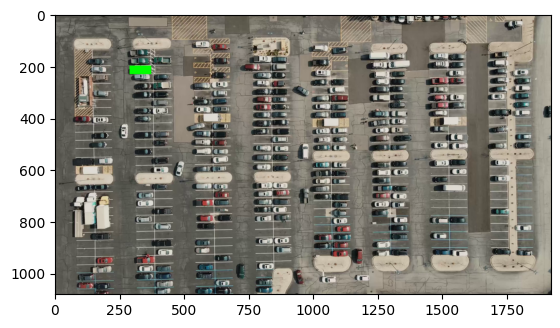

In [14]:
#drawing the bbox in the image
cv2.rectangle(parking_img_copy, (x_start, y_start), (x_end, y_end), (0, 255, 0), cv2.FILLED)
plt.imshow(parking_img_copy[:, :, ::-1])

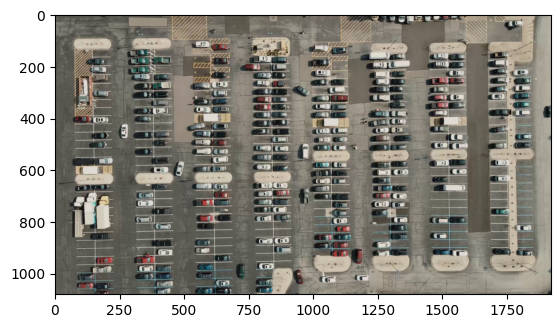

In [15]:
#copying parking img
parking_img_copy2 = parking_image.copy()
plt.imshow(parking_img_copy2[:, :, ::-1])

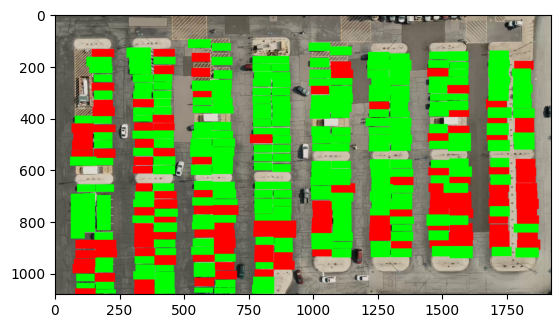

In [22]:
#loop through the annotations list then we are going to draw the bbox's in the image
for i in data["annotations"]:
  #print(i)
  x, y, w, h = i["bbox"]
  # print(i["category_id"])
  if i["category_id"] == 1:  # empty space
    cv2.rectangle(parking_img_copy2, (int(x), int(y)), (int(x+w), int(y+h)), (0, 0, 255), cv2.FILLED)
  if i["category_id"] == 2:  # non-empty
    cv2.rectangle(parking_img_copy2, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), cv2.FILLED)

plt.imshow(parking_img_copy2[:, :, ::-1])

In [23]:
#cropping the images
empty = 0
non_empty = 0
for i in data["annotations"]:
  x1, y1, x2, y2 = i["bbox"]
  x1, y1, x2, y2 = int(x1), int(y1), int(x1+x2), int(y1+y2)
  if i["category_id"] == 1: #empty
    empty += 1
    empty_cropped_image = parking_image[y1:y2, x1:x2]
    cv2.imwrite(f"/content/drive/MyDrive/AbelFolder/dataset/cropped_dataset/empty/empty_{empty}.jpg", empty_cropped_image)
  if i["category_id"] == 2: #non-empty
    non_empty += 1
    non_empty_cropped_image = parking_image[y1:y2, x1:x2]
    cv2.imwrite(f"/content/drive/MyDrive/AbelFolder/dataset/cropped_dataset/non-empty/non_empty_{non_empty}.jpg", non_empty_cropped_image)

print(f"Number of empty spots: {empty}")
print(f"Number of non-empty spots: {non_empty}")

Number of empty spots: 126
Number of non-empty spots: 266


In [25]:
#Generating large number of images from a single image
import os

cropped_empty_dataset_path = "/content/drive/MyDrive/AbelFolder/dataset/cropped_dataset/empty"
cropped_non_empty_dataset_path = "/content/drive/MyDrive/AbelFolder/dataset/cropped_dataset/non-empty"

#getting contents from the path
empty_contents = os.listdir(cropped_empty_dataset_path)
non_empty_contents = os.listdir(cropped_non_empty_dataset_path)

In [26]:
#importing image datagenerator from tensorflow to create multiple images from single image by doing flip, rotation, scaling etc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
#defining the parameters
data_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [28]:
#loading all the empty images into a list
empty_bef_augmentation = []
for i in empty_contents:
  image = cv2.imread(f"{cropped_empty_dataset_path}/{i}")
  empty_bef_augmentation.append(image)


In [30]:
print(len(empty_bef_augmentation))

126


In [31]:
#loading all the non-empty images into a list
non_empty_bef_augmentation = []
for i in non_empty_contents:
  image = cv2.imread(f"{cropped_non_empty_dataset_path}/{i}")
  non_empty_bef_augmentation.append(image)

In [32]:
print(len(non_empty_bef_augmentation))

266


In [33]:
#appyling the data augmentation for every single image
augmentation_count = 0
for i in empty_bef_augmentation:
  for j in range(10):
    augmented_img = next(data_gen.flow(np.expand_dims(i, axis=0), batch_size=1))[0]
    augmentation_count += 1
    cv2.imwrite(f"/content/drive/MyDrive/AbelFolder/dataset/parking_spot_dataset/empty/empty_{augmentation_count}.jpg", augmented_img)

print("Total Images:",augmentation_count)

Total Images: 1260


In [34]:
#appyling the data augmentation for every single image
augmentation_count = 0
for i in non_empty_bef_augmentation:
  for j in range(10):
    augmented_img = next(data_gen.flow(np.expand_dims(i, axis=0), batch_size=1))[0]
    augmentation_count += 1
    cv2.imwrite(f"/content/drive/MyDrive/AbelFolder/dataset/parking_spot_dataset/non_empty/empty_{augmentation_count}.jpg", augmented_img)

print("Total Images:",augmentation_count)

Total Images: 2660


In [35]:
1260+2660

3920